In [172]:
import numpy as np


def gradient(func, x, h= 1e-5):
    x = np.array(x, dtype=float)
    
    grad = np.zeros_like(x)
    for i in range (x.size):
        ei = np.zeros_like(x)
        ei[i] = 1.0
        grad[i] = (func(x + h*ei) - func(x - h*ei)) / (2*h)
    return grad

def gradient_descent_path(func, learning_rate, h, conv_criterion, max_iter, initial_guess):
    x = np.array(initial_guess, dtype=float)
    path = [x.copy()]

    for it in range (1, max_iter + 1):
        g = gradient(func, x, h=h)

        gnorm = np.linalg.norm(g, ord=2)
        if gnorm < conv_criterion:
            return np.vstack(path), True, it, gnorm
        
        x = x - learning_rate * g
        if not np.all(np.isfinite(x)):
            return np.vstack(path), False, it, np.nan
        
        path.append(x.copy())

    return np.vstack(path), False, max_iter, gnorm
        
    


In [173]:
def fx(args):
    x, y = args
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2
    

In [174]:
import matplotlib.pyplot as plt


def plot_contour_figure():
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.array([fx([i, j]) for j in y for i in x]).reshape(len(y), len(x))
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    return fig, ax

def show_path(title, path):
    fig, ax = plot_contour_figure()
    ax.plot(path[:,0], path[:,1], marker='o', linewidth=1)
    ax.scatter(path[0,0], path[0,1], s=60, c='black', label='start')
    ax.scatter(path[-1,0], path[-1,1], s=60, c='yellow', edgecolors='k', label='end')
    ax.set_title(title); ax.legend()
    plt.show()

Starting point: (0.4, 0.5)
Converged: True
Iterations: 60
Final coordinates: [2.99999999 2.00000003]
f(final) = 1.5535416103888612e-14
----------------------------------------


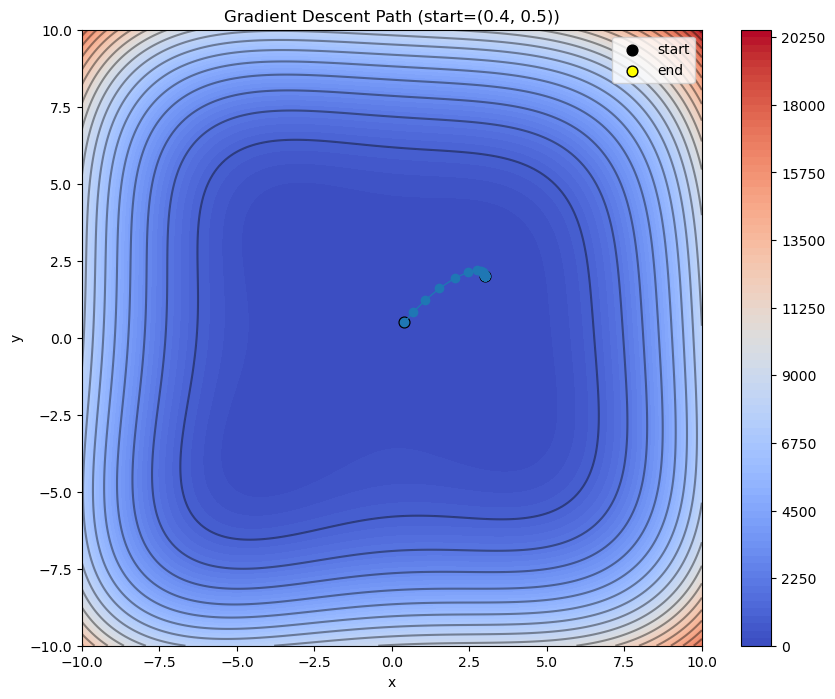

Starting point: (1.0, 1.5)
Converged: True
Iterations: 60
Final coordinates: [2.99999999 2.00000003]
f(final) = 1.1804305510690019e-14
----------------------------------------


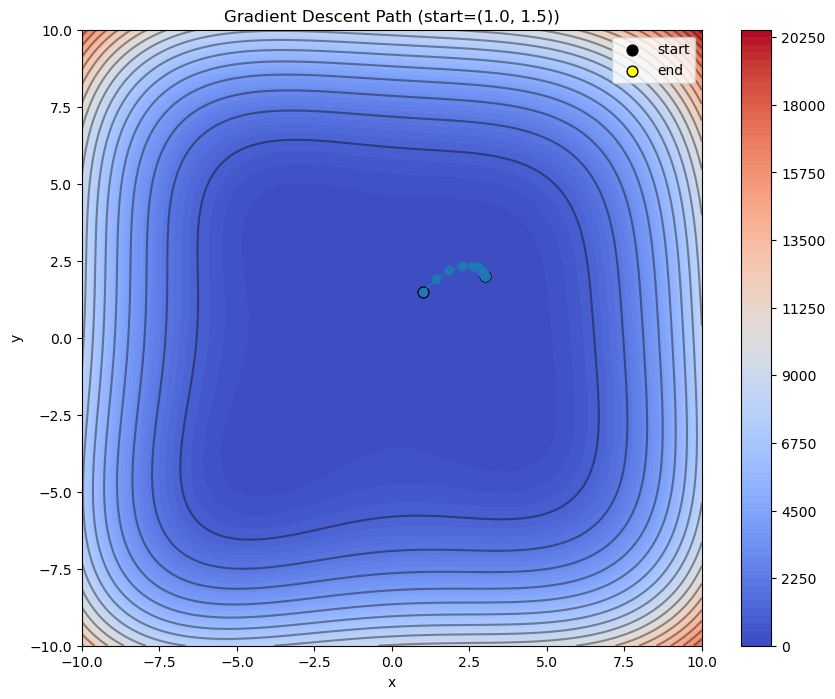

In [175]:
initial = [(0.4, 0.5), (1.0, 1.5)]
lr = 0.01

for start in initial:
    path, conv, iters, gnorm = gradient_descent_path(
        fx,
        learning_rate = lr,
        h = 1e-5,
        conv_criterion = 1e-6,
        max_iter = 20000,
        initial_guess = start
    )

    # ↓↓↓ MUST BE INSIDE LOOP ↓↓↓
    print("Starting point:", start)
    print("Converged:", conv)
    print("Iterations:", iters)
    print("Final coordinates:", path[-1])
    print("f(final) =", fx(path[-1]))
    print("-" * 40)

    show_path(f"Gradient Descent Path (start={start})", path)


In [176]:
import numpy as np
import sympy as sp


def gradient(func, x, h= 1e-5):
    x = np.array(x, dtype=float)
    
    
    grad = np.zeros_like(x)
    for i in range (x.size):
        ei = np.zeros_like(x)
        ei[i] = 1.0
        grad[i] = (func(x + h*ei) - func(x - h*ei)) / (2*h)
    return grad

def gradient_descent_momentum(func, h, conv_criterion, max_iter, initial_guess, beta=0.9, alpha=0.01):
    x = np.array(initial_guess, dtype=float)
    m = np.zeros_like(x)
    path = [x.copy()]

    for it in range (1, max_iter + 1):
        g = gradient(func, x, h=h)

        gnorm = np.linalg.norm(g, ord=2)
        if gnorm < conv_criterion:
            return np.vstack(path), True, it, gnorm
        
        m = beta * m - alpha * g
        x = x + m
        if not np.all(np.isfinite(x)):
            return np.vstack(path), False, it, np.nan
        
        path.append(x.copy())

    return np.vstack(path), False, max_iter, gnorm
        
    


In [177]:
def fx(args):
    x, y = args
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2
    

Starting point: (0.4, 0.5)
Converged: True
Iterations: 334
Final coordinates: [ 3.58442834 -1.84812652]
f(final) = 1.1847062481942983e-15
----------------------------------------


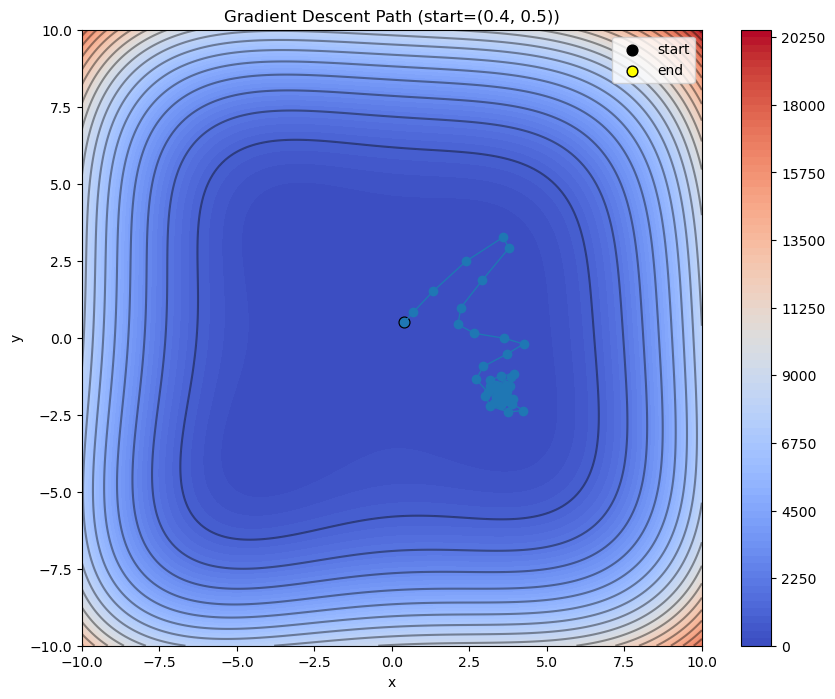

Starting point: (1.0, 1.5)
Converged: True
Iterations: 322
Final coordinates: [ 3.58442835 -1.84812653]
f(final) = 3.0833873604019344e-15
----------------------------------------


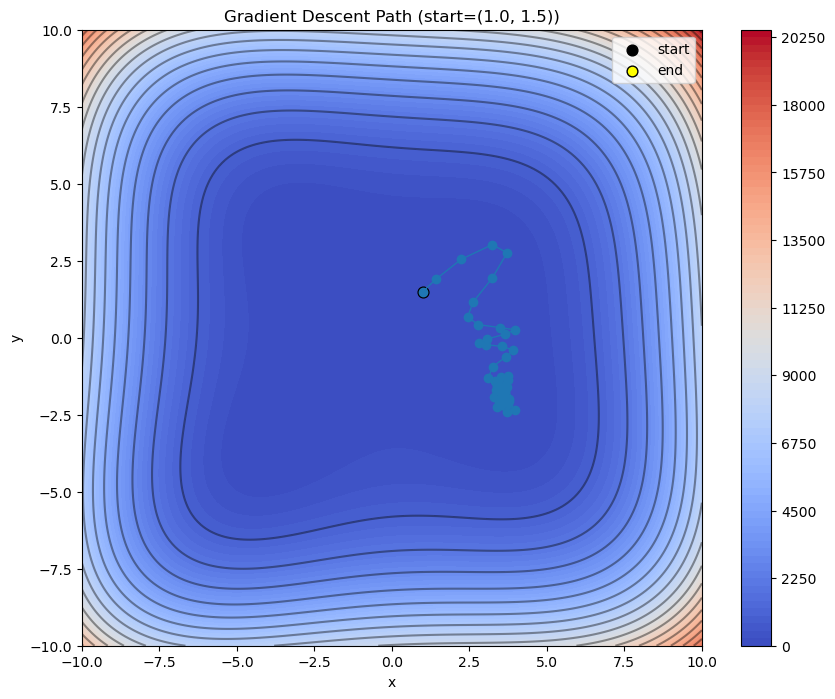

In [178]:
import matplotlib.pyplot as plt


def plot_contour_figure():
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)
    Z = np.array([fx([i, j]) for j in y for i in x]).reshape(len(y), len(x))
    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("x"); ax.set_ylabel("y")
    return fig, ax

def show_path(title, path):
    fig, ax = plot_contour_figure()
    ax.plot(path[:,0], path[:,1], marker='o', linewidth=1)
    ax.scatter(path[0,0], path[0,1], s=60, c='black', label='start')
    ax.scatter(path[-1,0], path[-1,1], s=60, c='yellow', edgecolors='k', label='end')
    ax.set_title(title); ax.legend()
    plt.show()


initial = [(0.4, 0.5), (1.0, 1.5)]
beta = 0.9


for start in initial:
    path, conv, iters, gnorm = gradient_descent_momentum(
        fx,
        
        beta = 0.9,
        h = 1e-5,
        conv_criterion = 1e-6,
        max_iter = 20000,
        initial_guess = start
    )

    # ↓↓↓ MUST BE INSIDE LOOP ↓↓↓
    print("Starting point:", start)
    print("Converged:", conv)
    print("Iterations:", iters)
    print("Final coordinates:", path[-1])
    print("f(final) =", fx(path[-1]))
    print("-" * 40)

    show_path(f"Gradient Descent Path (start={start})", path)


In [179]:
import numpy as np


n_points = 200
x_points= np.random.uniform(0, 10, n_points)

sigma = 2000
noise = np.random.normal(0, sigma)

def true_model(x):
    return 3000*x + 5000

y = true_model(x_points) + noise

x_all = np.array(x_points)
y_all = np.array(y)

In [180]:
indices = np.arange(n_points)
np.random.shuffle(indices)


tr_x = indices[:160]

te_x = indices[160:]

x_train = x_all[tr_x]
x_test = x_all[te_x]

y_train = y_all[tr_x]
y_test = y_all[te_x]

print("Train data points:", len(x_train))
print("Test data points:", len(x_test))


Train data points: 160
Test data points: 40


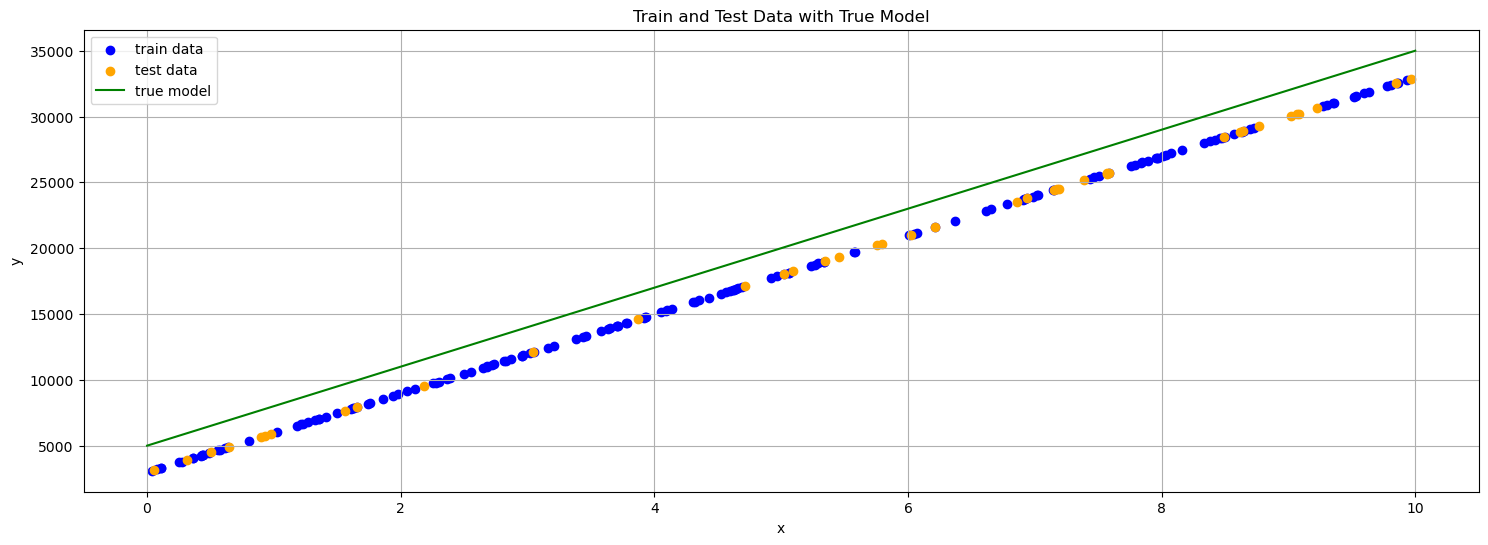

In [181]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.grid(True)
plt.scatter(x_train, y_train, label = 'train data', color='blue')
plt.scatter(x_test, y_test, label = 'test data', color='orange')

x_line = np.linspace(0, 10, 100)
y_line = true_model(x_line)
plt.plot(x_line, y_line, label='true model', color='green')


plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Train and Test Data with True Model")
plt.show()

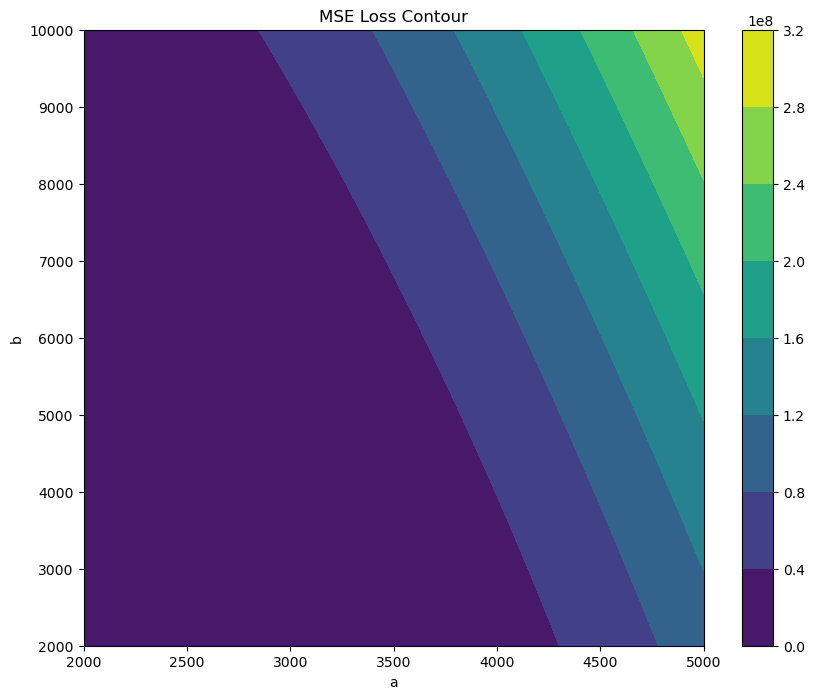

MSE Loss with true parameters on training data: [[3.99345227e+07 3.89012821e+07 3.78816758e+07 ... 9.96082336e+07
  1.01260933e+08 1.02927266e+08]
 [3.94850818e+07 3.84574659e+07 3.74434842e+07 ... 1.00266850e+08
  1.01925174e+08 1.03597132e+08]
 [3.90388732e+07 3.80168819e+07 3.70085249e+07 ... 1.00928698e+08
  1.02592646e+08 1.04270229e+08]
 ...
 [1.37963272e+07 1.38711436e+07 1.39595941e+07 ... 2.91757249e+08
  2.94518005e+08 2.97292396e+08]
 [1.39836380e+07 1.40640790e+07 1.41581542e+07 ... 2.93052617e+08
  2.95818998e+08 2.98599013e+08]
 [1.41741809e+07 1.42602466e+07 1.43599464e+07 ... 2.94351217e+08
  2.97123222e+08 2.99908862e+08]]


In [182]:
import numpy as np

def linear_model(x, a, b):
    return a * x + b





def mse_loss(x, y, a, b):
    y_pred = linear_model(x_train, a, b)
    return np.mean((y_pred - y)**2)

a = np.linspace(2000, 5000, 200)
b = np.linspace(2000, 10000, 200)

A, B = np.meshgrid(a, b)

z = np.zeros_like(A)
for i in range (A.shape[0]):
    for j in range (A.shape[1]):
        z[i, j] = mse_loss(x_train, y_train, A[i, j], B[i, j])



plt.figure(figsize=(10, 8))
contour = plt.contourf(A, B, z)
plt.colorbar(contour)
plt.xlabel("a")
plt.ylabel("b")
plt.title("MSE Loss Contour")
plt.show()
print("MSE Loss with true parameters on training data:", z)





In [183]:
def gradient_m(func, x, y, a, b, h=1e-5):
    x, y = np.array(x, dtype=float), np.array(y, dtype=float)
    params = np.array([a, b], dtype=float)

    grad  = np.zeros_like(params)
    for i in range(params.size):
        vc = np.zeros_like(params)
        vc[i] = 1.0
        grad[i] = ((func(params + h*vc) - func(params - h*vc))/ (2*h))
    return grad



In [184]:
def momentum_gradient_descent(func, h, conv_criterion, max_iter, initial_guess, beta=0.9, alpha=0.01):
    params = np.zeros_like(initial_guess, dtype=float)
    m = np.zeros_like(params)
    path = [params.copy()]

    for it in range (1, max_iter + 1):
        g =  gradient_m(func, x_train, y_train, params[0], params[1], h=h)
        gnorm = np.linalg.norm(g, ord=2)
        if gnorm < conv_criterion:
            return np.vstack(path), True, it, gnorm
        
        m = beta*m - alpha*g
        params = params + m
        if not np.all(np.isfinite(params)):
            return np.vstack(path), False, it, np.nan
        path.append(params.copy())

    return np.vstack(path), False , max_iter, gnorm




In [185]:
def ms_params(params):
    a, b = params
    y_pred = a * x_train + b
    return np.mean((y_train - y_pred)**2)



Starting point: (0, 0)
Converged: True
Iterations: 451
Final coordinates: [3000.         2969.56433252]
MSE at final: 6.528833184578498e-15
----------------------------------------


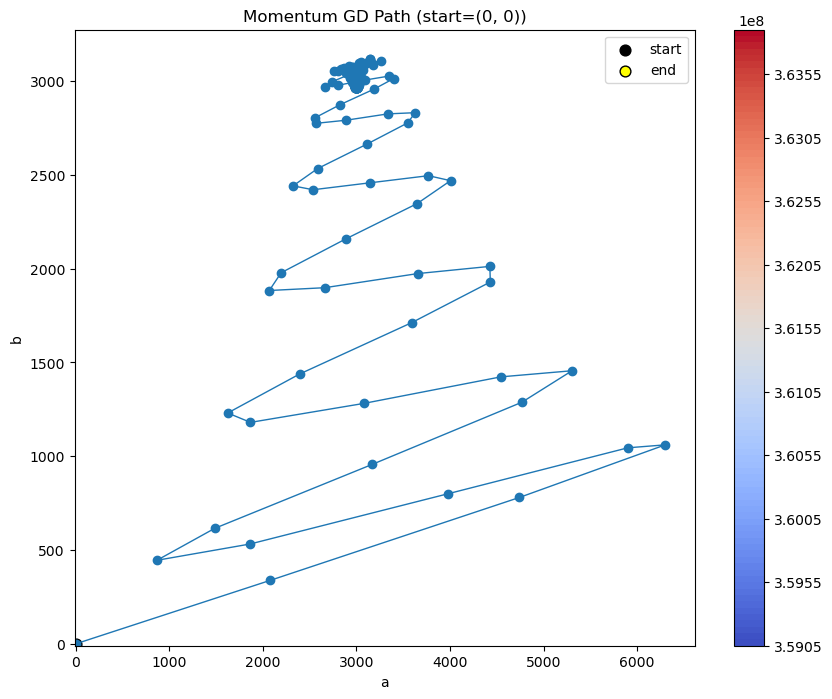

In [186]:
def plot_contour_figure():
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.array([ms_params([i, j]) for j in y for i in x]).reshape(len(y), len(x))

    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path):
    fig, ax = plot_contour_figure()
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()


initial = [(0, 0)]
beta = 0.9

for start in initial:
    path, conv, iters, gnorm = momentum_gradient_descent(
        func=ms_params,
        initial_guess=start,
        alpha=0.01,
        beta=beta,
        h=1e-5,
        conv_criterion=1e-6,
        max_iter=2000
    )

    print("Starting point:", start)
    print("Converged:", conv)
    print("Iterations:", iters)
    print("Final coordinates:", path[-1])
    print("MSE at final:", mse_loss(x_train, y_train, path[-1][0], path[-1][1]))
    print("-" * 40)

    show_path(f"Momentum GD Path (start={start})", path)


Starting point: (0, 0)
Converged: True
Iterations: 454
Final coordinates: [3000.00000002 2969.56433251]
MSE at final: 3.679687220296047e-15
----------------------------------------


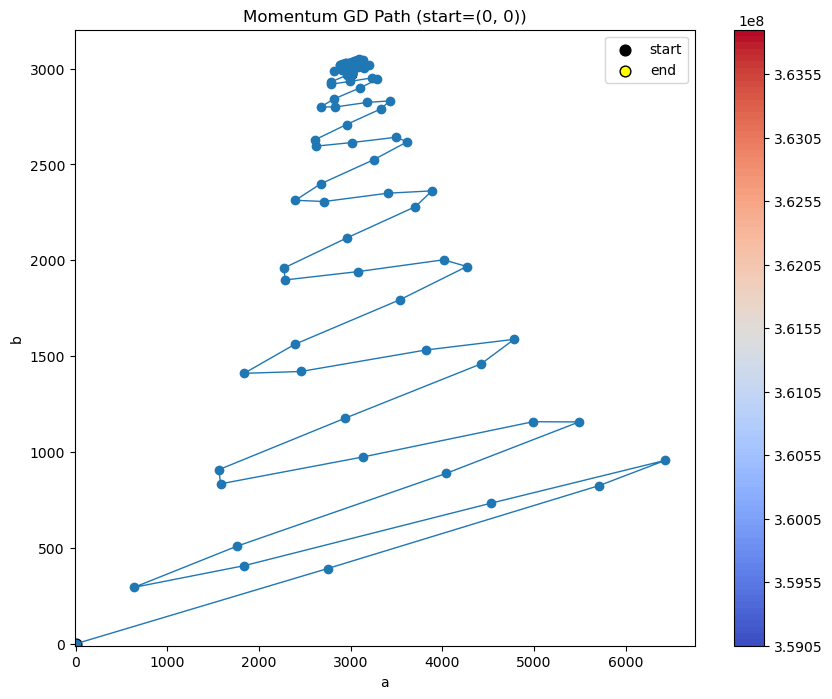

In [187]:
def ms1_params(params):
    a, b = params
    y_pred = a * x_test + b
    return np.mean((y_test - y_pred)**2)



def plot_contour_figure():
    x = np.linspace(-10, 10, 200)
    y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(x, y)

    Z = np.array([ms_params([i, j]) for j in y for i in x]).reshape(len(y), len(x))

    fig, ax = plt.subplots(figsize=(10, 8))
    cf = ax.contourf(X, Y, Z, 100, cmap='coolwarm')
    ax.contour(X, Y, Z, 20, colors='k', alpha=0.4)
    fig.colorbar(cf)
    ax.set_xlabel("a")
    ax.set_ylabel("b")
    return fig, ax


def show_path(title, path):
    fig, ax = plot_contour_figure()
    ax.plot(path[:, 0], path[:, 1], marker='o', linewidth=1)

    # FIXED start and end points colors
    ax.scatter(path[0, 0], path[0, 1], s=60, color='black', label='start')
    ax.scatter(path[-1, 0], path[-1, 1], s=60, color='yellow', edgecolors='k', label='end')

    ax.set_title(title)
    ax.legend()
    plt.show()


initial = [(0, 0)]
beta = 0.9

for start in initial:
    path, conv, iters, gnorm = momentum_gradient_descent(
        func=ms1_params,
        initial_guess=start,
        alpha=0.01,
        beta=beta,
        h=1e-5,
        conv_criterion=1e-6,
        max_iter=2000
    )

    print("Starting point:", start)
    print("Converged:", conv)
    print("Iterations:", iters)
    print("Final coordinates:", path[-1])
    print("MSE at final:", mse_loss(x_train, y_train, path[-1][0], path[-1][1]))
    print("-" * 40)

    show_path(f"Momentum GD Path (start={start})", path)
